In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC,NuSVC
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.metrics import auc,classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.ensemble import BaggingClassifier

In [13]:
# Read the regrouped data from group 1 to 9; drop the gender column
file_path_train = '/Users/hongggenzhang/Desktop/ECG/data/normal_male/train.csv'
file_path_test =  '/Users/hongggenzhang/Desktop/ECG/data/normal_male/test.csv'
df_train = pd.read_csv(file_path_train, sep = ',')
df_train = df_train.drop(['Gender'], axis=1)
X_train = df_train.drop(['Group'], axis=1)
y_train = df_train['Group']

df_test = pd.read_csv(file_path_test, sep = ',')
df_test = df_test.drop(['Gender'], axis=1)
X_test = df_test.drop(['Group'], axis=1)
y_test = df_test['Group']
X_test

,QRS_Duration__ms_C,R_T_Axis_deviation,Ventricular_Rate_C,P_Axis_C,R_Axis_C,T_Axis_C,QTc_Calculation_C,QTc_Bazett_C,QTc_Friderica_C,PR_Interval_C,...,P_Peak_Amplitude_C_aVR,Q_Peak_Amplitude_C_aVR,R_Peak_Amplitude_C_aVR,S_Peak_Amplitude_C_aVR,T_Peak_Amplitude_C_aVR,Q_Area_C_aVR,R_Area_C_aVR,S_Area_C_aVR,T_Area_C_aVR,Summated_QRS_integral_aVR
0,90.0,58.0,61.0,67.0,103.0,45.0,406.0,129,406,146.0,...,-131.0,351.0,195.0,68.0,-327.0,364.0,101.0,47.0,-1999.0,512.0
1,96.0,-17.0,53.0,56.0,41.0,58.0,384.0,122,394,138.0,...,-63.0,893.0,341.0,0.0,-351.0,827.0,301.0,0.0,-1998.0,1128.0
2,56.0,45.0,161.0,64.0,88.0,43.0,419.0,133,356,98.0,...,-92.0,0.0,58.0,595.0,-166.0,0.0,22.0,306.0,-1021.0,328.0
3,92.0,91.0,63.0,10.0,101.0,10.0,413.0,131,411,154.0,...,-83.0,708.0,400.0,126.0,-581.0,838.0,209.0,103.0,-3506.0,1150.0
4,64.0,-14.0,136.0,63.0,56.0,70.0,442.0,140,386,96.0,...,-126.0,1137.0,375.0,0.0,-283.0,680.0,279.0,0.0,-1571.0,959.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,102.0,70.0,119.0,37.0,105.0,35.0,455.0,145,408,140.0,...,-136.0,927.0,556.0,0.0,-507.0,698.0,887.0,0.0,-2482.0,1585.0
2515,98.0,13.0,54.0,51.0,91.0,78.0,405.0,128,413,112.0,...,-170.0,0.0,126.0,771.0,-366.0,0.0,69.0,1134.0,-1937.0,1203.0
2516,70.0,33.0,121.0,12.0,65.0,32.0,409.0,130,364,116.0,...,-87.0,0.0,34.0,717.0,-317.0,0.0,11.0,485.0,-1679.0,496.0
2517,100.0,78.0,113.0,4.0,98.0,20.0,434.0,137,390,126.0,...,-58.0,346.0,219.0,0.0,-151.0,382.0,265.0,0.0,-773.0,647.0


## SVM

In [14]:
# normalize the data
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
#training a classifer
classifier = SVC(kernel="rbf", gamma='auto')
classifier.fit(X_train, y_train)

SVC(gamma='auto')

In [6]:
#testing on test data set 
y_pred = classifier.predict(X_test)
print(f"Classification report for classifier {classifier}:\n"
    f"{classification_report(y_test, y_pred)}\n")

Classification report for classifier SVC(gamma='auto'):
              precision    recall  f1-score   support

         1.0       0.92      0.66      0.77        35
         2.0       0.59      0.71      0.64        68
         3.0       0.68      0.65      0.66       151
         4.0       0.59      0.58      0.59       197
         5.0       0.56      0.52      0.54       251
         6.0       0.54      0.52      0.53       318
         7.0       0.50      0.49      0.49       354
         8.0       0.55      0.58      0.56       628
         9.0       0.64      0.65      0.64       517

    accuracy                           0.57      2519
   macro avg       0.62      0.59      0.60      2519
weighted avg       0.58      0.57      0.57      2519




<Axes: >

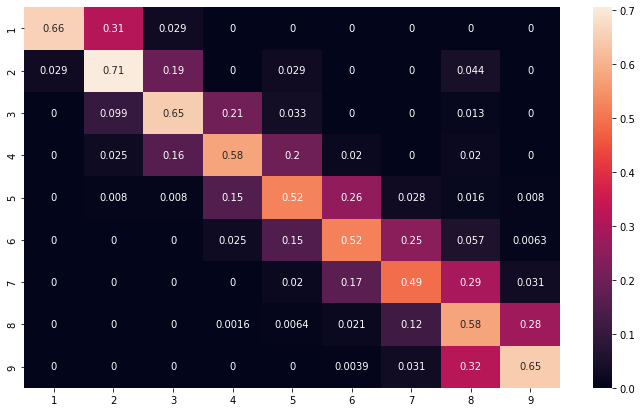

In [8]:
conf = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(conf / np.sum(conf, axis=1)[:, None], index = [i for i in range(1,10)],
                     columns = [i for i in range(1,10)])

plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)

## MLP

In [15]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(500,500,200,9),
    max_iter=50,
    alpha=1e-3,
    solver="sgd",
    verbose=False,
    random_state=1,
    learning_rate_init=1e-3,
)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print(f"Classification report for classifier {mlp}:\n"
    f"{classification_report(y_test, y_pred)}\n")

Classification report for classifier MLPClassifier(alpha=0.001, hidden_layer_sizes=(500, 500, 200, 9), max_iter=50,
              random_state=1, solver='sgd'):
              precision    recall  f1-score   support

         1.0       0.62      0.43      0.51        35
         2.0       0.51      0.69      0.58        68
         3.0       0.66      0.63      0.64       151
         4.0       0.60      0.56      0.58       197
         5.0       0.53      0.44      0.48       251
         6.0       0.51      0.57      0.54       318
         7.0       0.49      0.48      0.49       354
         8.0       0.54      0.52      0.53       628
         9.0       0.60      0.64      0.62       517

    accuracy                           0.55      2519
   macro avg       0.56      0.55      0.55      2519
weighted avg       0.55      0.55      0.55      2519




/Users/hongggenzhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


<Axes: >

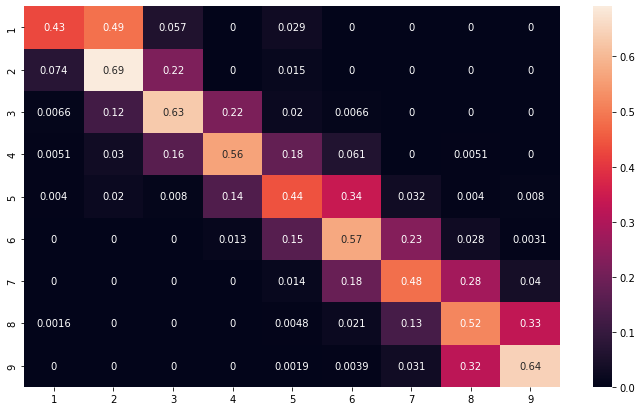

In [16]:
conf = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(conf / np.sum(conf, axis=1)[:, None], index = [i for i in range(1,10)],
                     columns = [i for i in range(1,10)])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)

## AdaBoost

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
clf_ada = AdaBoostClassifier(n_estimators=200,learning_rate=0.1,  random_state=0)
#clf_ada = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,  random_state=0)
clf_ada.fit(X_train, y_train)

y_pred = clf_ada.predict(X_test)
print(f"Classification report (9 group) for classifier {clf_ada}:\n"
    f"{classification_report(y_test, y_pred)}\n")

Classification report (9 group) for classifier AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=0):
              precision    recall  f1-score   support

         1.0       0.78      0.20      0.32        35
         2.0       0.54      0.76      0.63        68
         3.0       0.60      0.27      0.37       151
         4.0       0.41      0.47      0.44       197
         5.0       0.43      0.53      0.47       251
         6.0       0.40      0.55      0.46       318
         7.0       0.23      0.51      0.32       354
         8.0       0.45      0.24      0.31       628
         9.0       0.61      0.32      0.42       517

    accuracy                           0.39      2519
   macro avg       0.50      0.43      0.42      2519
weighted avg       0.46      0.39      0.39      2519




<Axes: >

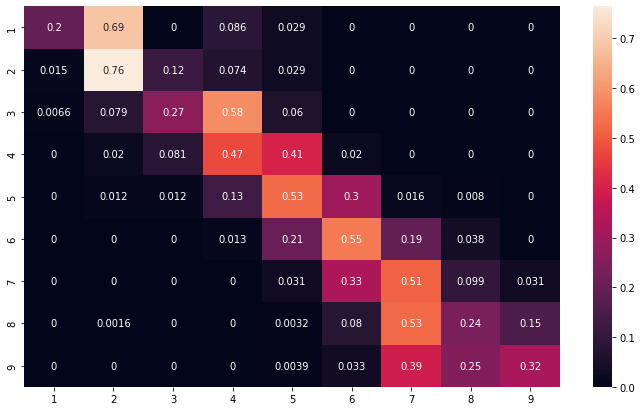

In [22]:
conf = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(conf / np.sum(conf, axis=1)[:, None], index = [i for i in range(1,10)],
                     columns = [i for i in range(1,10)])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)